In [391]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn import *
import numpy as np
from random import *
from scipy.stats import chi2_contingency
filename = "titanic_train.csv"
filename2 = "titanic_test.csv"

# A. Preliminary analysis

## 1. 
Open the file "titanic_train.csv". 
Describe the different attributes :
- Prompt the different attributes’ types.
- Display the distribution or repartition of the different attributes.
- Comment on the proportion of missing data.

In [137]:
titanic_train = pd.read_csv(filename, sep=",", header=0) #lecture de table sans header
titanic_train

,PassengerId,Survived,Pclass,Name,FullName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,299,1,1,Saalfeld,Mr. Adolphe,male,NaN,0,0,19988,30.5000,C106,S
1,300,1,1,Baxter,Mrs. James (Helene DeLaudeniere Chaput),female,50.00,0,1,PC 17558,247.5208,B58 B60,C
2,301,1,3,Kelly,Miss. Anna Katherine Annie Kate,female,NaN,0,0,9234,7.7500,NaN,Q
3,302,1,3,McCoy,Mr. Bernard,male,NaN,2,0,367226,23.2500,NaN,Q
4,303,0,3,Johnson,Mr. William Cahoone Jr,male,19.00,0,0,LINE,0.0000,NaN,S
5,304,1,2,Keane,Miss. Nora A,female,NaN,0,0,226593,12.3500,E101,Q
6,305,0,3,Williams,Mr. Howard Hugh Harry,male,NaN,0,0,A/5 2466,8.0500,NaN,S
7,306,1,1,Allison,Master. Hudson Trevor,male,0.92,1,2,113781,151.5500,C22 C26,S
8,307,1,1,Fleming,Miss. Margaret,female,NaN,0,0,17421,110.8833,NaN,C
9,308,1,1,Penasco y Castellana,Mrs. Victor de Satode (Maria Josefa Perez de ...,female,17.00,1,0,PC 17758,108.9000,C65,C


### - Différents types d'attributs

In [138]:
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
FullName        object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### - Affichage de la répartition des différents attributs

In [139]:
print(titanic_train.columns[0])
print("Nbre de colonnes : ", len(titanic_train.columns))

PassengerId
Nbre de colonnes :  13


In [140]:
# variables quantitatives
d1 = titanic_train["PassengerId"]
d2 = titanic_train["Survived"]
d3 = titanic_train["Pclass"]
d4 = titanic_train["Age"]
d5 = titanic_train["SibSp"]
d6 = titanic_train["Parch"]
d7 = titanic_train["Fare"]

# variables qualitatives
d8 = titanic_train["Name"]
d9 = titanic_train["FullName"]
d10 = titanic_train["Sex"]
d11 = titanic_train["Ticket"]
d12 = titanic_train["Cabin"]
d13 = titanic_train["Embarked"]

/home/yaba/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/yaba/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([481.,  69.,  25.,   2.,  10.,   4.,   0.,   0.,   0.,   2.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

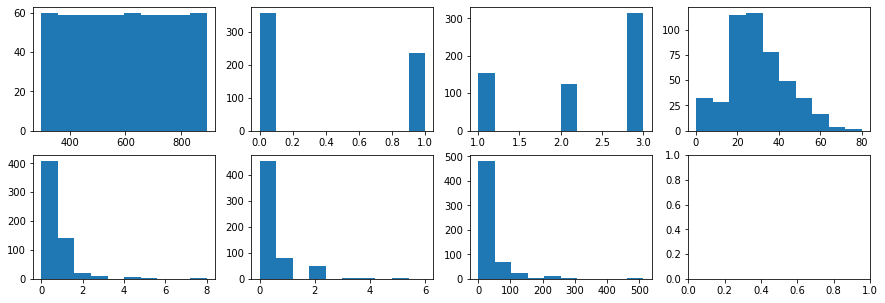

In [141]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 5))
axes[0][0].hist(d1)
axes[0][1].hist(d2)
axes[0][2].hist(d3)
axes[0][3].hist(d4)
axes[1][0].hist(d5)
axes[1][1].hist(d6)
axes[1][2].hist(d7)
#axes[0][4].hist(d3)

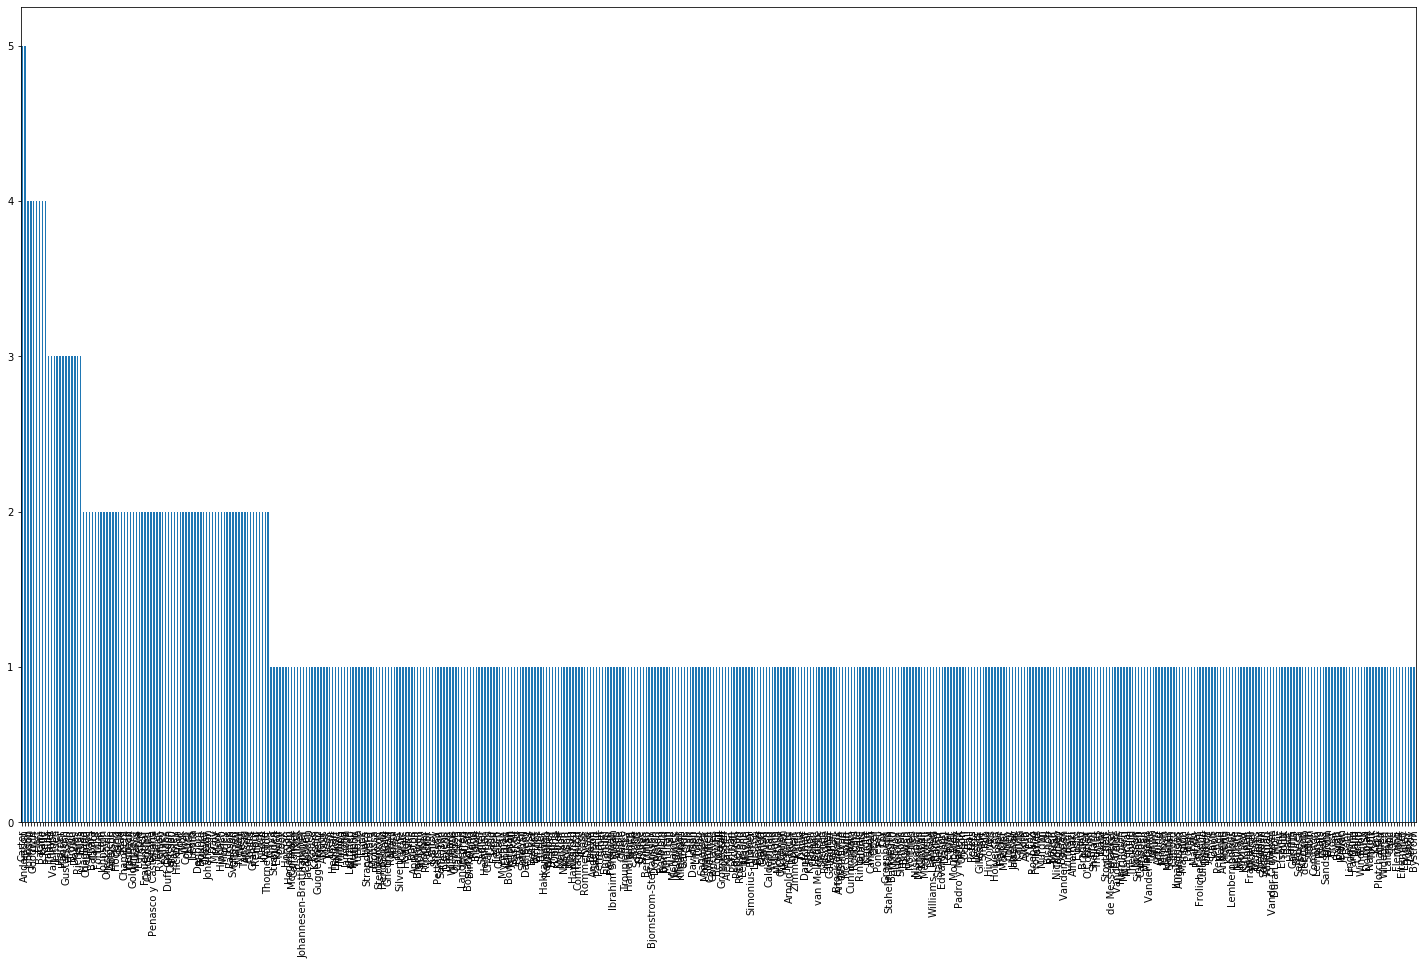

In [142]:
plt.figure(figsize=(25,15))
d8.value_counts().plot(kind='bar')
plt.show()

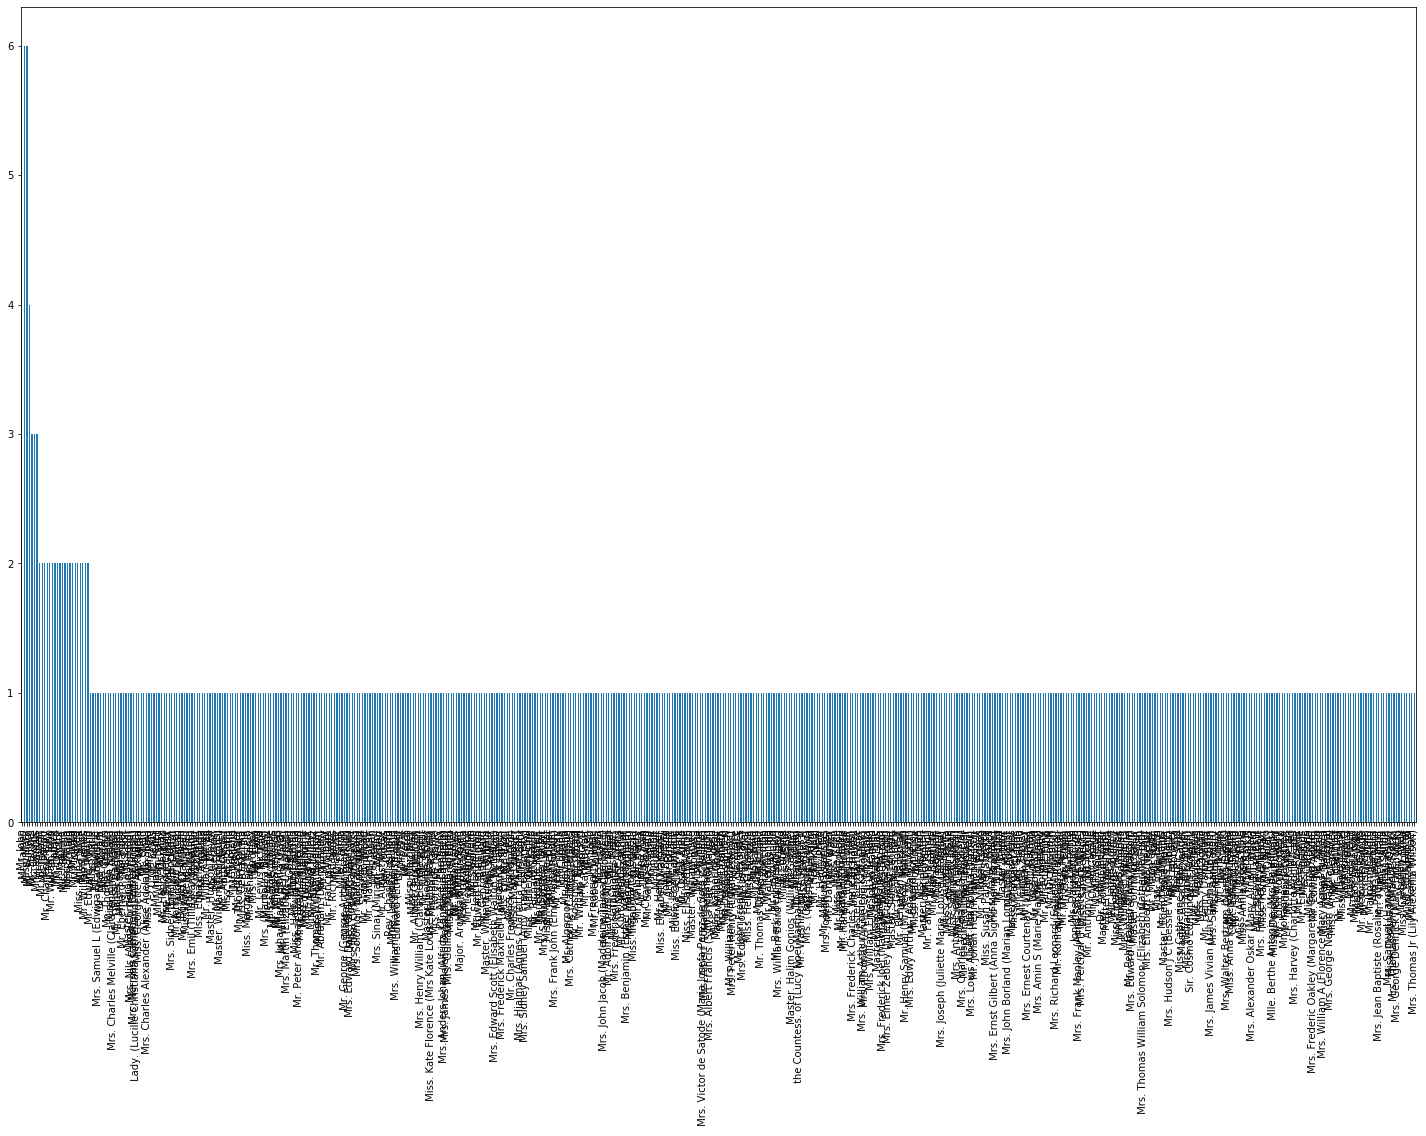

In [143]:
plt.figure(figsize=(25,15))
d9.value_counts().plot(kind='bar')
plt.show()

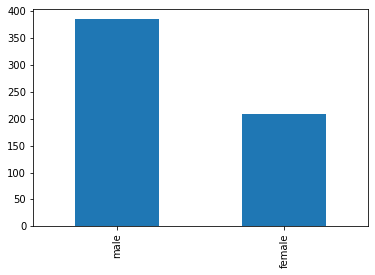

In [144]:
#plt.figure(figsize=(25,15))
d10.value_counts().plot(kind='bar')
plt.show()

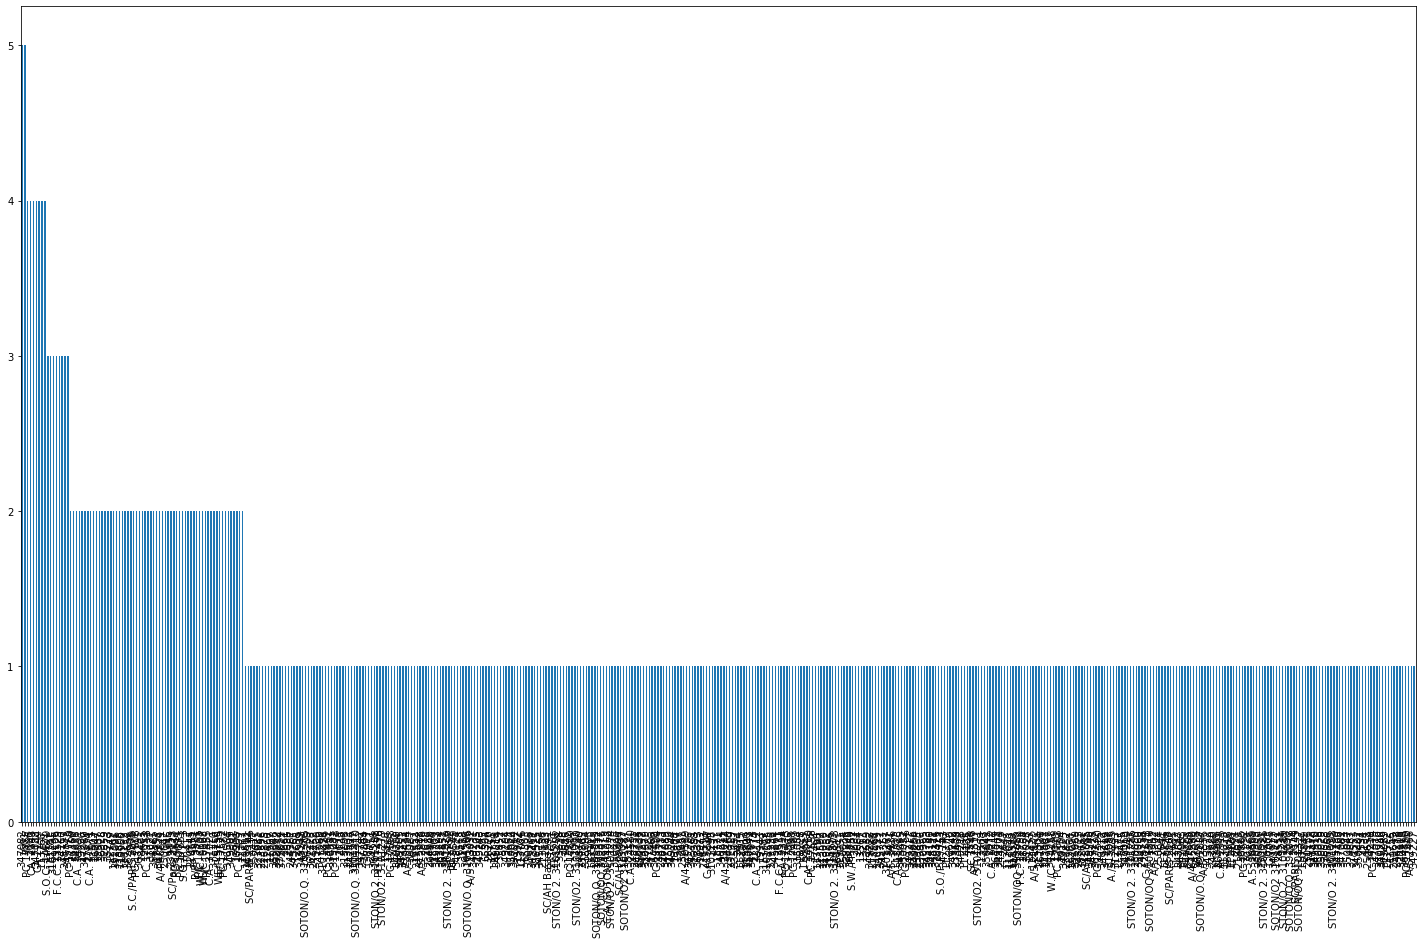

In [145]:
plt.figure(figsize=(25,15))
d11.value_counts().plot(kind='bar')
plt.show()

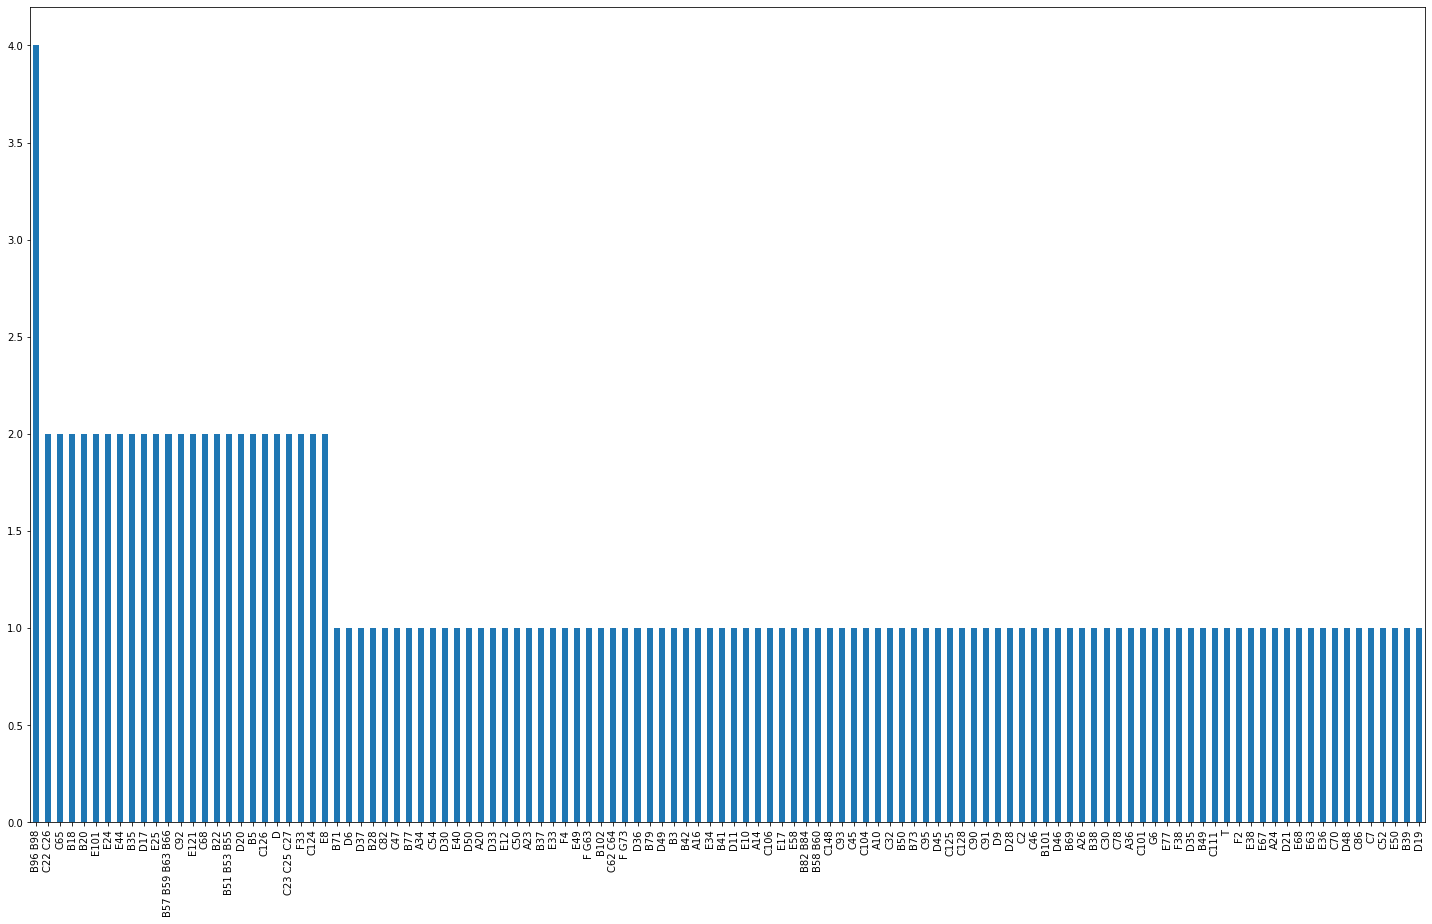

In [146]:
plt.figure(figsize=(25,15))
d12.value_counts().plot(kind='bar')
plt.show()

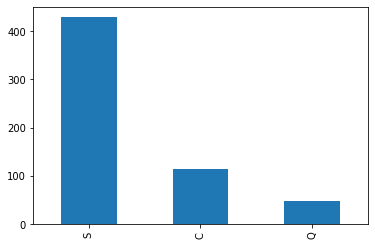

In [147]:
#plt.figure(figsize=(25,15))
d13.value_counts().plot(kind='bar')
plt.show()

### - Proportion des données manquantes

In [148]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
FullName         0
Sex              0
Age            120
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          450
Embarked         1
dtype: int64

## 2. Nombre des gens morts et qui ont survécus

### - Nombre total de morts et des survivants

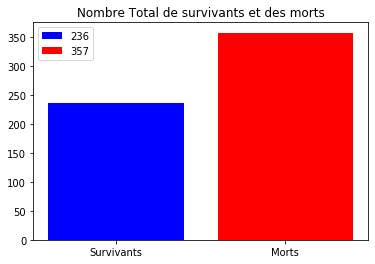

In [149]:
#marks=[d2.value_counts()[0], d2.value_counts()[1]]
bars=('Survivants','Morts')
y=np.arange(len(bars))
plt.title("Nombre Total de survivants et des morts")
plt.bar(y[0],d2.value_counts()[1],color='b')
plt.bar(y[1],d2.value_counts()[0],color='r')
plt.legend([d2.value_counts()[1], d2.value_counts()[0]])
plt.xticks(y,bars)
plt.show()

### - Pourcentage des survivants et des morts

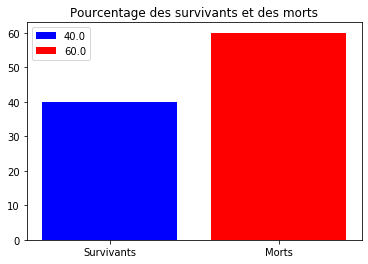

In [150]:
#marks=[d2.value_counts()[0], d2.value_counts()[1]]
p1 = (d2.value_counts()[1] / len(d2))*100
p1 = round(p1, 0)
p2 = (d2.value_counts()[0] / len(d2))*100
p2 = round(p2, 0)
bars=('Survivants','Morts')
y=np.arange(len(bars))
plt.title("Pourcentage des survivants et des morts")
plt.bar(y[0],p1,color='b')
plt.bar(y[1],p2,color='r')
plt.legend([p1, p2])
plt.xticks(y,bars)
plt.show()

## B. Women and children first

### 1. Compare the survival rates between men and women. Comment.

In [151]:
nbFem=0
nbHom = 0
for i in range(len(titanic_train)):
    if d2[i] == 1 and d10[i] == 'male':
            nbHom +=1
    elif d2[i]==1 and d10[i] == 'female':
            nbFem +=1
print("Nombre de femmes : ",nbFem)
print("Nombre d'hommes : ",nbHom)

Nombre de femmes :  158
Nombre d'hommes :  78


On en deduit qu'il y a plus de femmes qui ont survécus que d'hommes.

### 2. Add a "Child" variable in your data, the value of which will be "child" if the passenger is less than 18yo and "adult" otherwise.

In [165]:
#on ajoute une colonne Child avec aucune valeur
titanic_train.insert(len(titanic_train.columns),'Child', '  ')

In [174]:
# on met à jour la colonne Child
for i in range(len(titanic_train)):
    if titanic_train.at[i, 'Age'] < 18 :
        titanic_train.at[i, 'Child'] = 'child' 
    else:
        titanic_train.at[i, 'Child'] = 'adult'

In [175]:
titanic_train

,PassengerId,Survived,Pclass,Name,FullName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
0,299,1,1,Saalfeld,Mr. Adolphe,male,NaN,0,0,19988,30.5000,C106,S,adult
1,300,1,1,Baxter,Mrs. James (Helene DeLaudeniere Chaput),female,50.00,0,1,PC 17558,247.5208,B58 B60,C,adult
2,301,1,3,Kelly,Miss. Anna Katherine Annie Kate,female,NaN,0,0,9234,7.7500,NaN,Q,adult
3,302,1,3,McCoy,Mr. Bernard,male,NaN,2,0,367226,23.2500,NaN,Q,adult
4,303,0,3,Johnson,Mr. William Cahoone Jr,male,19.00,0,0,LINE,0.0000,NaN,S,adult
5,304,1,2,Keane,Miss. Nora A,female,NaN,0,0,226593,12.3500,E101,Q,adult
6,305,0,3,Williams,Mr. Howard Hugh Harry,male,NaN,0,0,A/5 2466,8.0500,NaN,S,adult
7,306,1,1,Allison,Master. Hudson Trevor,male,0.92,1,2,113781,151.5500,C22 C26,S,child
8,307,1,1,Fleming,Miss. Margaret,female,NaN,0,0,17421,110.8833,NaN,C,adult
9,308,1,1,Penasco y Castellana,Mrs. Victor de Satode (Maria Josefa Perez de ...,female,17.00,1,0,PC 17758,108.9000,C65,C,child


### Assess the survival rate depending on the value of your new variable. Comment.

In [177]:
nbChild=0
nbAdult = 0
for i in range(len(titanic_train)):
    if titanic_train.at[i, 'Survived'] == 1 and titanic_train.at[i, 'Child'] == 'child':
            nbChild +=1
    elif titanic_train.at[i, 'Survived'] == 1 and titanic_train.at[i, 'Child'] == 'adult':
            nbAdult +=1
print("Nombre d'enfants : ",nbChild)
print("Nombre d'adultes : ",nbAdult)

Nombre d'enfants :  40
Nombre d'adultes :  196


Il y a beaucoup plus d'adultes qui ont survécus que des enfants.

### 3. What potentially biased hypothesis was considered in the previous question ? 

L'hypothèse biaisé qui était considéré dans la question précédente c'est que tous les passagers qui ont moins de 18 ans sont enfant mais tout ceux qui ont l'âge supérieure à 18 ans ou dont l'âge n'est pas précisé sont considérés comme adulte.

### Propose a solution to fix this problem and re-assess the survival rate acccordingly. Are the results very different ?

Une solution pour fixer ce problème c'est de considérer les étudiants dont l'âge est inférieur à 18 et aussi ceux dont l'âge n'est pas précisé comme des enfants.

In [183]:
# on met à jour la colonne Child
for i in range(len(titanic_train)):
    if titanic_train.at[i, 'Age'] >= 18 :
        titanic_train.at[i, 'Child'] = 'adult' 
    else:
        titanic_train.at[i, 'Child'] = 'child'

In [184]:
titanic_train

,PassengerId,Survived,Pclass,Name,FullName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
0,299,1,1,Saalfeld,Mr. Adolphe,male,NaN,0,0,19988,30.5000,C106,S,child
1,300,1,1,Baxter,Mrs. James (Helene DeLaudeniere Chaput),female,50.00,0,1,PC 17558,247.5208,B58 B60,C,adult
2,301,1,3,Kelly,Miss. Anna Katherine Annie Kate,female,NaN,0,0,9234,7.7500,NaN,Q,child
3,302,1,3,McCoy,Mr. Bernard,male,NaN,2,0,367226,23.2500,NaN,Q,child
4,303,0,3,Johnson,Mr. William Cahoone Jr,male,19.00,0,0,LINE,0.0000,NaN,S,adult
5,304,1,2,Keane,Miss. Nora A,female,NaN,0,0,226593,12.3500,E101,Q,child
6,305,0,3,Williams,Mr. Howard Hugh Harry,male,NaN,0,0,A/5 2466,8.0500,NaN,S,child
7,306,1,1,Allison,Master. Hudson Trevor,male,0.92,1,2,113781,151.5500,C22 C26,S,child
8,307,1,1,Fleming,Miss. Margaret,female,NaN,0,0,17421,110.8833,NaN,C,child
9,308,1,1,Penasco y Castellana,Mrs. Victor de Satode (Maria Josefa Perez de ...,female,17.00,1,0,PC 17758,108.9000,C65,C,child


In [185]:
nbChild=0
nbAdult = 0
for i in range(len(titanic_train)):
    if titanic_train.at[i, 'Survived'] == 1 and titanic_train.at[i, 'Child'] == 'child':
            nbChild +=1
    elif titanic_train.at[i, 'Survived'] == 1 and titanic_train.at[i, 'Child'] == 'adult':
            nbAdult +=1
print("Nombre d'enfants : ",nbChild)
print("Nombre d'adultes : ",nbAdult)

Nombre d'enfants :  73
Nombre d'adultes :  163


Nous constatons que le taux des enfants qui ont survécu est passé de 40 à 73 et celui des adultes de 196 à 163.

### 4. Revert to the "Child" variable from question B.2. Find the survival rates of the passengers depending on their age and sex. What can you conclude on the efficiency of the "Women and children first" policy during the evacuation of the Titanic ?

In [188]:
# The survival rates of the passengers depending on their age and sex
enfantMale=0
enfantFemale = 0
adultMale=0
adultFemale = 0
for i in range(len(titanic_train)):
    if titanic_train.at[i, 'Survived'] == 1 and titanic_train.at[i, 'Child'] == 'child' and titanic_train.at[i, 'Sex'] == 'male':
            enfantMale +=1
    elif titanic_train.at[i, 'Survived'] == 1 and titanic_train.at[i, 'Child'] == 'child' and titanic_train.at[i, 'Sex'] == 'female':
            enfantFemale +=1
    elif titanic_train.at[i, 'Survived'] == 1 and titanic_train.at[i, 'Child'] == 'adult' and titanic_train.at[i, 'Sex'] == 'male':
            adultMale +=1
    elif titanic_train.at[i, 'Survived'] == 1 and titanic_train.at[i, 'Child'] == 'adult' and titanic_train.at[i, 'Sex'] == 'female':
            adultFemale +=1
print("Nombre d'enfants male: ",enfantMale)
print("Nombre d'enfants femelle : ",enfantFemale)
print("Nombre d'adultes male: ",adultMale)
print("Nombre d'adultes femelle : ",adultFemale)

Nombre d'enfants male:  27
Nombre d'enfants femelle :  46
Nombre d'adultes male:  51
Nombre d'adultes femelle :  112


On constate qu'il y a plus de passagers de sexe féminin qui ont survécus aussi bien chez les enfants que les adultes.

#### - What can you conclude on the efficiency of the "Women and children first" policy during the evacuation of the Titanic

Sur 593 passagers à bord, il y a 236 qui ont survécus et parmi lesquels il y a 112 femmes  (soit 47 %), 73 enfants (soit 31%) et 51 hommes (soit 22%). 

### 5. Load the data from the file "titanic_test.csv" and add the "Child" variable as in question B.2. Convert this variable as well as the variable "Survived" into factors (using the appropriate Python command). This conversion will prevent any type compatibility issue and should be applied to both data sets.

In [202]:
# chargement du fichier "titanic_test.csv"
titanic_test = pd.read_csv(filename2, sep=",", header=0)

In [203]:
#on ajoute une colonne Child avec aucune valeur
titanic_test.insert(len(titanic_test.columns), 'Child' , '  ')

In [266]:
# on met à jour la colonne Child
for i in range(len(titanic_test)):
    if titanic_test.at[i, 'Age'] >= 18 :
        titanic_test.at[i, 'Child'] = 'adult' 
    else:
        titanic_test.at[i, 'Child'] = 'child'

In [269]:
titanic_test.head()

,PassengerId,Survived,Pclass,Name,FullName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,adult
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S,adult


### 6. Train your classifier : classifier = naiveBayes. Describe the content of the variable "classifier". What are the probabilities displayed and how do they relate with the probabilities computed in the previous questions ? Comment.

In [410]:
# Encode the features and the labels
labelEncoder = preprocessing.LabelEncoder()
survived_train = labelEncoder.fit_transform(titanic_train['Survived'])
sex_train = labelEncoder.fit_transform(titanic_train['Sex'])
child_train= labelEncoder.fit_transform(titanic_train['Child'])

In [418]:
child_train2d = []
for i in range(len(child_train)):
    child_train2d.append([child_train[i]])

In [422]:
model_train1 = GaussianNB()
model_train1.fit(child_train2d, survived_train)

GaussianNB(priors=None, var_smoothing=1e-09)

var_smoothingfloat => Portion of the largest variance of all features that is added to variances for calculation stability.
Prior probabilities of the classes. If specified the priors are not adjusted according to the data.

In [429]:
# On prédit les passagers qui ont survécus en fonction de leur âge
train_predict1 = model_train1.predict(child_train2d)

In [433]:
ppost_train1 = model_train1.predict_proba(child_train2d)
ppost_train1.round(2)

array([[0.62, 0.38],
       [0.59, 0.41],
       [0.62, 0.38],
       ...,
       [0.62, 0.38],
       [0.59, 0.41],
       [0.59, 0.41]])

In [453]:
accuracy_train = metrics.accuracy_score(survived_train, train_predict1)
print("Précision : ",accuracy_train)

Précision :  0.6020236087689713


On a une précision de 60 % sur les données d'apprentissage.

### 7. Apply your classification model to the validation set using the following command

In [434]:
survived_test = labelEncoder.fit_transform(titanic_test['Survived'])
#sex_train = labelEncoder.fit_transform(titanic_train['Sex'])
child_test = labelEncoder.fit_transform(titanic_test['Child'])

In [440]:
child_test2d = []
for i in range(len(child_test)):
    child_test2d.append([child_test[i]])


In [442]:
model_test = GaussianNB()
model_test.fit(child_test2d, survived_test)
test_predict = model_test.predict(child_test2d)

In [437]:
ppost_test = model_test.predict_proba(child_test2d)
ppost_test.round(2)

array([[0.67, 0.33],
       [0.67, 0.33],
       [0.67, 0.33],
       [0.67, 0.33],
       [0.67, 0.33],
       [0.6 , 0.4 ],
       [0.67, 0.33],
       [0.6 , 0.4 ],
       [0.67, 0.33],
       [0.6 , 0.4 ],
       [0.6 , 0.4 ],
       [0.67, 0.33],
       [0.67, 0.33],
       [0.67, 0.33],
       [0.6 , 0.4 ],
       [0.67, 0.33],
       [0.6 , 0.4 ],
       [0.6 , 0.4 ],
       [0.67, 0.33],
       [0.6 , 0.4 ],
       [0.67, 0.33],
       [0.67, 0.33],
       [0.6 , 0.4 ],
       [0.67, 0.33],
       [0.6 , 0.4 ],
       [0.67, 0.33],
       [0.6 , 0.4 ],
       [0.67, 0.33],
       [0.6 , 0.4 ],
       [0.6 , 0.4 ],
       [0.67, 0.33],
       [0.6 , 0.4 ],
       [0.6 , 0.4 ],
       [0.67, 0.33],
       [0.67, 0.33],
       [0.67, 0.33],
       [0.6 , 0.4 ],
       [0.67, 0.33],
       [0.67, 0.33],
       [0.6 , 0.4 ],
       [0.67, 0.33],
       [0.67, 0.33],
       [0.6 , 0.4 ],
       [0.6 , 0.4 ],
       [0.67, 0.33],
       [0.6 , 0.4 ],
       [0.6 , 0.4 ],
       [0.6 ,

#### — Compare the resulting vector with the real solution and compute the accuracy of your classifier.

In [443]:
accuracy_test = metrics.accuracy_score(survived_test, test_predict)
print("Précision : ",accuracy_test)

Précision :  0.6442953020134228


On en déduit que le classifieur a 64 % de précision sur les données de test. Ce qui est meilleure à la précision obtenue sur les données d'apprentissage

## C.Survival rates depending on the social class

### 1. Display the survival rates for all 3 classes of passengers.

In [405]:
nb_1=0
nb_2 = 0
nb_3=0
for i in range(len(titanic_train)):
    if titanic_train.at[i, 'Survived'] == 1 and titanic_train.at[i, 'Pclass'] == 1:
            nb_1 +=1
    elif titanic_train.at[i, 'Survived'] == 1 and titanic_train.at[i, 'Pclass'] == 2:
            nb_2 +=1
    elif titanic_train.at[i, 'Survived'] == 1 and titanic_train.at[i, 'Pclass'] == 3:
            nb_3 +=1
print("Il y a : ")            
print("\t ",nb_1," passagers vivants en classe 1 ")
print("\t ",nb_2," passagers vivants en classe 2 ")
print("\t ",nb_3," passagers vivants en classe 3 ")

Il y a : 
	  106  passagers vivants en classe 1 
	  62  passagers vivants en classe 2 
	  68  passagers vivants en classe 3 


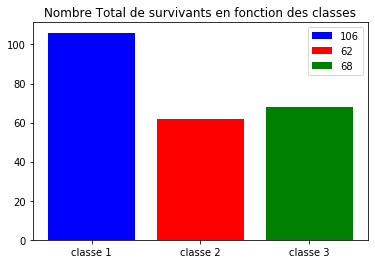

In [449]:
bars=('classe 1','classe 2', 'classe 3')
y=np.arange(len(bars))
plt.title("Nombre Total de survivants en fonction des classes")
plt.bar(y[0],nb_1,color='b')
plt.bar(y[1],nb_2,color='r')
plt.bar(y[2],nb_3,color='g')
plt.legend([nb_1, nb_2, nb_3])
plt.xticks(y,bars)
plt.show()

il y a beaucoup plus de survivants en première qu'en troisième puis en deuxième.

### 2.

#### — Transform the variable "Pclass" in a factor(·)

In [406]:
titanic_train['Pclass'] = pd.Categorical(titanic_train.Pclass)
titanic_train['Pclass'].dtype

CategoricalDtype(categories=[1, 2, 3], ordered=False)

#### — Create a new attribute "Fare2" the value of which can be "<10", "10- 20", "20-30", "30+" or "NA" depending on the price payed by the pas- senger (available in the "Fare" column). Do not forget to convert this new attribute into a factor too.

In [381]:
#on ajoute une colonne Fare2 avec aucune valeur
titanic_train.insert(11,'Fare2', '  ')

In [378]:
# on met à jour la colonne Fare2
for i in range(len(titanic_train)):
    if titanic_train.at[i, 'Fare'] < 10 :
        titanic_train.at[i, 'Fare2'] = '<10' 
    elif titanic_train.at[i, 'Fare'] >= 10 and titanic_train.at[i, 'Fare'] < 20:
        titanic_train.at[i, 'Fare2'] = '10-20'
    elif titanic_train.at[i, 'Fare'] >= 20 and titanic_train.at[i, 'Fare'] < 30:
        titanic_train.at[i, 'Fare2'] = '20-30'
    elif titanic_train.at[i, 'Fare'] >= 30:
        titanic_train.at[i, 'Fare2'] = '30+'
    else:
        titanic_train.at[i, 'Fare2'] = 'NA'

In [382]:
# On convertit la colonne Fare2 en variable categorielle
titanic_train['Fare2'] = pd.Categorical(titanic_train.Fare2)
titanic_train['Fare2'].dtype

CategoricalDtype(categories=['10-20', '20-30', '30+', '<10'], ordered=False)

### 3. Are the new attributes "Pclass" and "Fare2" independant ? Justify.

In [390]:
# détermination de la table de contingence entre Fare2 et Pclass
tableConting = pd.crosstab(titanic_train['Fare2'], titanic_train['Pclass'])
tableConting

Pclass,1,2,3
Fare2,,,
10-20,0,63,51
20-30,24,38,28
30+,125,18,23
<10,5,5,213


In [392]:
# on calcule la p-value
st_chi2, st_p, st_dof, st_exp = chi2_contingency(tableConting)

In [393]:
# Statistique khi2
print("Statistique Khi-2 : ",st_chi2)
 
# Nombe de degrés de liberté
print("Nombre de degré de liberté : ",st_dof)
 
# Pvalue : l'unique valeur nécessaire pour prendre notre décision
print("Pvalue : ",st_p)

Statistique Khi-2 :  495.9705123917846
Nombre de degré de liberté :  6
Pvalue :  6.204344613606239e-104


#### -  Test au seuil de 1%
Rejetons l’hypothèse nulle au seuil de 1%, donc pour une pvaleur inférieure à 0.01.

### 4. Display the survival rates depending on the value of "Fare2". Comment.

In [395]:
nb10_20=0
nb20_30 = 0
nb30=0
nb10=0
for i in range(len(titanic_train)):
    if titanic_train.at[i, 'Survived'] == 1 and titanic_train.at[i, 'Fare2'] == '10-20':
            nb10_20 +=1
    elif titanic_train.at[i, 'Survived'] == 1 and titanic_train.at[i, 'Fare2'] == '20-30':
            nb20_30 +=1
    elif titanic_train.at[i, 'Survived'] == 1 and titanic_train.at[i, 'Fare2'] == '30+':
            nb30 +=1
    elif titanic_train.at[i, 'Survived'] == 1 and titanic_train.at[i, 'Fare2'] == '<10':
            nb10 +=1
print("Il y a : ")            
print("\t",nb10_20," passagers ayant payé entre 10 et 20")
print("\t",nb20_30," passagers ayant payé entre 20 et 30")
print("\t",nb30," passagers ayant payé au dessus de 30")
print("\t",nb10," passagers ayant payé moins de 10")

Il y a : 
	 50  passagers ayant payé entre 10 et 20
	 40  passagers ayant payé entre 20 et 30
	 108  passagers ayant payé au dessus de 30
	 38  passagers ayant payé moins de 10


### 5. Using questions B.6 et B.7, train a Naive Bayes classifier with these 2 attributes and assess its accuracy on the "titanic_test.csv" validation set.

In [398]:
# Encode the features and the labels
survived_train2 = labelEncoder.fit_transform(titanic_train['Survived'])
fare2_train = labelEncoder.fit_transform(titanic_train['Fare2'])
pclass_train= labelEncoder.fit_transform(titanic_train['Pclass'])

# on fusionne les colonnes Fare2 et Pclass dans une table pclass_fare
pclass_fare_train = []
for i in range(len(pclass_train)):
    pclass_fare_train.append([fare2_train[i], pclass_train[i]])
    
# on commence notre apprentissage
model_train2 = GaussianNB()
model_train2.fit(pclass_fare_train, survived_train2)

GaussianNB(priors=None, var_smoothing=1e-09)

In [450]:
# On prédit les passagers en fonction de leur classe sociale et du prix de leur billets
train_predict2 = model_train2.predict(pclass_fare_train)
#train_predict2 == survived_train2

In [ ]:
# Sur les données test

In [452]:
accuracy_1 = metrics.accuracy_score(survived_train2, train_predict2)
print("Précision : ",accuracy_1)

Précision :  0.7015177065767285


Ce modèle a une précision de 70 % sur les données d'apprentissage.